[[ 40.71484    -74.03743   ]
 [ 40.71486    -74.04081   ]
 [ 40.71288    -74.05684   ]
 ...
 [ 40.76184743 -73.96118673]
 [ 40.75864    -73.96528   ]
 [ 40.76148    -73.96077   ]]


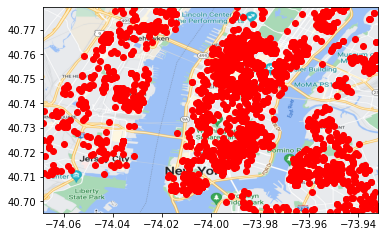

In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt

# Load data into np array
with open('Selenium_BS4/outputdata.json', mode='r', encoding='utf-8') as f:
        feeds = json.load(f)


cords = np.zeros((len(feeds),2))

for i in range(len(feeds)):
    cords[i][0] = feeds[i]['lat']
    cords[i][1] = feeds[i]['lng']
    
print(cords)

# Show map of listings
img = plt.imread("Map.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.06840513108762, -73.93210599778683, 40.69537925928026, 40.77927402335186])
ax.scatter(cords[:,1], cords[:,0], c= 'r')
plt.show()

In [4]:
# Function to get distance value of a cord from a reference cord, the reference cord will be max val and the further away the quicker it drops off
import math

def calcDistance(refLat, refLng, targetLat, targetLng):
    R = 6371e3 #metres
    φ1 = targetLat * math.pi/180 # φ, λ in radians
    φ2 = refLat * math.pi/180
    Δφ = (refLat-targetLat) * math.pi/180
    Δλ = (refLng-targetLng) * math.pi/180

    a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    d = R * c #in metres
    return d

# Return the distance weight, 
# dist is how far from the original point 
# maxVal is the value returned at distance from point = 0
# falloff is how fast the returned value approaches 0, has to be below 1, greater than 0, closer to 0 is faster falloff
def calcDistanceWeight(dist, maxVal, falloff):
    return math.exp(-(falloff) * dist)*maxVal



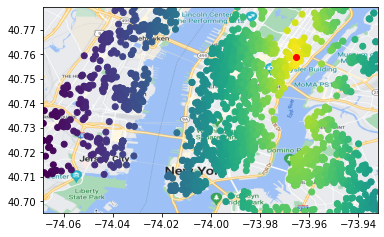

In [8]:
# Show distance with example value

# Original point
lat = -73.96528
lng = 40.75864

# Show map of listings with distance from point
latList = cords[:,1]
lngList = cords[:,0]
dist = np.zeros((np.shape(latList)[0],1))
for i in range(len(cords)):
    maxVal = 100
    fallOff = .0001
    dist[i] = calcDistanceWeight(calcDistance(lat, lng, latList[i], lngList[i]), maxVal, fallOff)

img = plt.imread("Map.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.06840513108762, -73.93210599778683, 40.69537925928026, 40.77927402335186])
ax.scatter(cords[:,1], cords[:,0], c=dist)
ax.scatter(lat,lng,c='r')
plt.show()

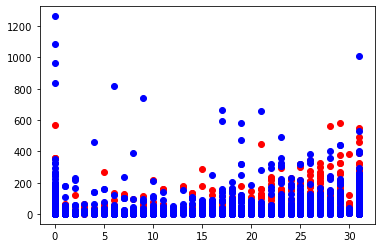

In [92]:
# Testing trends in data

# Plotting if superhost vs number of bookings

# Create two data sets
class1 = [] #Is a superhost
class2 = [] #Is not a superhost

for i in range(len(feeds)):
    try:
#     Get number of bookings of this listing for May as booked on April 26th
        bookingsMay = 0
        for date in range(31):
            if feeds[i]['bookings'][date+61]['booked'] == 'true':
                bookingsMay += 1

    #     If super host, add to class 1, otherwise add to class 2
        if feeds[i]['superhost'] == True:
            class1.append([feeds[i]['lat'],feeds[i]['lng'],bookingsMay,int(feeds[i]['reviewCount'])])
        else:
            class2.append([feeds[i]['lat'],feeds[i]['lng'],bookingsMay,int(feeds[i]['reviewCount'])])
    except:
        pass

class1 = np.array(class1)
class2 = np.array(class2)
    
# Plot May bookings for each class with their respective review count
plt.scatter(class1[:,2], class1[:,3], c= 'r')
plt.scatter(class2[:,2], class2[:,3], c= 'b')
plt.show()

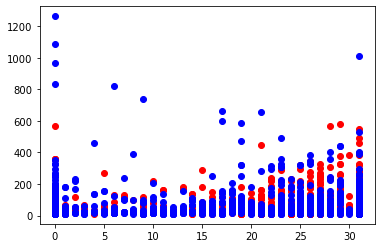

In [116]:
# Same as above but without listings that have under a certain amount of reviews

# Create two data sets
class1 = [] #Is a superhost
class2 = [] #Is not a superhost

# Discard listings with under this threshold of reviews
reviewMin = 10

for i in range(len(feeds)):
    try:
        if int(feeds[i]['reviewCount']) > reviewMin:
    #     Get number of bookings of this listing for May as booked on April 26th
            bookingsMay = 0
            for date in range(31):
                if feeds[i]['bookings'][date+61]['booked'] == 'true':
                    bookingsMay += 1

        #     If super host, add to class 1, otherwise add to class 2
            if feeds[i]['superhost'] == True:
                class1.append([feeds[i]['lat'],feeds[i]['lng'],bookingsMay,int(feeds[i]['reviewCount'])])
            else:
                class2.append([feeds[i]['lat'],feeds[i]['lng'],bookingsMay,int(feeds[i]['reviewCount'])])
    except:
        pass

class1 = np.array(class1)
class2 = np.array(class2)



# Plot May bookings for each class with their respective review count
plt.scatter(class1[:,2], class1[:,3], c= 'r')
plt.scatter(class2[:,2], class2[:,3], c= 'b')
plt.show()